# 🍽️ Zomato Restaurants Data Cleaning & Exploratory Data Analysis


## 🧾 Project Overview

This project explores the Zomato restaurants dataset to uncover insights about ratings, costs, cuisines, and customer services across major Indian cities. The dataset is messy and requires significant cleaning before analysis.

### 🎯 Objective

- Clean inconsistent and missing data
- Perform univariate and bivariate exploratory analysis
- Visualize patterns and answer key business questions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 📥 1. Data Import & Initial Overview

In [2]:
data=pd.read_csv('zomato.csv')

### Assessing Data

### Sumarry :
This dataset provides detailed information about restaurants across various cities and countries, helping in analysis of global food trends, customer preferences, pricing, and service availability. It includes both geographical and service-related metadata.

### Description about each coloumn -->
`address` : Complete address of the restaurant

`name` : Name of the restaurant

`online_order` : Do they accept online order (True/False)

`book_table` : Can we book table at the restaurant

`rate` : Rating given on zomato app

`votes` : Number of people gave rating

`phone` : Phone Number of the restaurant

`location` : Area of the restaurant

`rest_type` : Restaurant Type(Casual Dining/Cafe/Quick

`dish_liked` : Famous dishes

`cuisines`: Cuisines available

`approx_cost(for two people)` : Approx_cost for two people

`menu_item` : Menu item list

`listed_in(type)` : Category or primary type of service/experience the restaurant is known or listed for on the platform.

`listed_in(city)` : Restro located in which city

### Issues with data (*Data Quality Dimensions*)
**mising value** (*completness*): `rate` , `location`, `rest_type`,`dish_liked`,`cuisines` , `approx_cost(for two people)`

**change data type**(*Validity*) :  online_order ,book_table >> 'Bool'

                    rate >> 'int'
                    
                    approx_cost(for two people) >> 'int'

**Intresting thing**  :   *while no. of votes is 0 still rating is non zero* ---> **changed those ratings to NaN**


In [3]:
data=data[['name',	'online_order',	'book_table',	'rate',	'votes'  , 'location',	'rest_type'	,'cuisines',	'approx_cost(for two people)' ,  'listed_in(type)'	,'listed_in(city)']].copy()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


In [5]:
# Correcting types of columns
data['online_order']=data['online_order'].apply(lambda x: True if x=='Yes' else False)
data['book_table']=data['book_table'].apply(lambda x: True if x=='Yes' else False)

In [6]:
data

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,True,True,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,True,False,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,True,False,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,False,False,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,False,False,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,False,False,3.6 /5,27,Whitefield,Bar,Continental,"1,500",Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,False,False,NaN,0,Whitefield,Bar,Finger Food,600,Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,False,False,NaN,0,Whitefield,Bar,Finger Food,"2,000",Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,False,True,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",Pubs and bars,Whitefield


In [7]:
data['rate']=data['rate'].str.split('/').str[0]

In [8]:
data['rate'] = pd.to_numeric(data['rate'], errors='coerce')


In [9]:
data['approx_cost(for two people)']= pd.to_numeric(data['approx_cost(for two people)'].str.replace(',',''), errors='coerce') 

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51717 non-null  object 
 1   online_order                 51717 non-null  bool   
 2   book_table                   51717 non-null  bool   
 3   rate                         41665 non-null  float64
 4   votes                        51717 non-null  int64  
 5   location                     51696 non-null  object 
 6   rest_type                    51490 non-null  object 
 7   cuisines                     51672 non-null  object 
 8   approx_cost(for two people)  51371 non-null  float64
 9   listed_in(type)              51717 non-null  object 
 10  listed_in(city)              51717 non-null  object 
dtypes: bool(2), float64(2), int64(1), object(6)
memory usage: 3.6+ MB


In [11]:
data.describe()

,rate,votes,approx_cost(for two people)
count,41665.000000,51717.000000,51371.000000
mean,3.700449,283.697527,555.431566
std,0.440513,803.838853,438.850728
min,1.800000,0.000000,40.000000
25%,3.400000,7.000000,300.000000
50%,3.700000,41.000000,400.000000
75%,4.000000,198.000000,650.000000
max,4.900000,16832.000000,6000.000000


In [12]:
data.drop_duplicates(inplace=True)

In [13]:
# data['rate'][(data['rate'].isnull()) & (data['votes']==0)]=0
data.loc[(data['rate'].isnull()) & (data['votes']==0),'rate']=0

In [14]:
data=data.drop(data[data['location'].isnull()].index)
#all items (having null values in location col) are meaningless as almost all cols are having nan values 

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51588 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51588 non-null  object 
 1   online_order                 51588 non-null  bool   
 2   book_table                   51588 non-null  bool   
 3   rate                         51544 non-null  float64
 4   votes                        51588 non-null  int64  
 5   location                     51588 non-null  object 
 6   rest_type                    51382 non-null  object 
 7   cuisines                     51564 non-null  object 
 8   approx_cost(for two people)  51265 non-null  float64
 9   listed_in(type)              51588 non-null  object 
 10  listed_in(city)              51588 non-null  object 
dtypes: bool(2), float64(2), int64(1), object(6)
memory usage: 4.0+ MB


In [17]:
data.loc[data['rest_type'].isnull(), 'rest_type'] = 'Not known'
data.loc[data['cuisines'].isnull(), 'cuisines'] = 'Not known'

In [18]:
data.isnull().sum()

name                             0
online_order                     0
book_table                       0
rate                            44
votes                            0
location                         0
rest_type                        0
cuisines                         0
approx_cost(for two people)    323
listed_in(type)                  0
listed_in(city)                  0
dtype: int64

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51588 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51588 non-null  object 
 1   online_order                 51588 non-null  bool   
 2   book_table                   51588 non-null  bool   
 3   rate                         51544 non-null  float64
 4   votes                        51588 non-null  int64  
 5   location                     51588 non-null  object 
 6   rest_type                    51588 non-null  object 
 7   cuisines                     51588 non-null  object 
 8   approx_cost(for two people)  51265 non-null  float64
 9   listed_in(type)              51588 non-null  object 
 10  listed_in(city)              51588 non-null  object 
dtypes: bool(2), float64(2), int64(1), object(6)
memory usage: 4.0+ MB


In [20]:
data.loc[(data['votes']==0) & (data['rate']!=0),'rate']=np.nan

In [21]:
data.describe()

,rate,votes,approx_cost(for two people)
count,51525.000000,51588.000000,51265.000000
mean,2.985316,283.398678,555.170682
std,1.513464,803.425916,438.587661
min,0.000000,0.000000,40.000000
25%,3.000000,7.000000,300.000000
50%,3.600000,41.000000,400.000000
75%,3.900000,198.000000,650.000000
max,4.900000,16832.000000,6000.000000


# Data Cleaning Completed

In [22]:
data

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,False,False,3.6,27,Whitefield,Bar,Continental,1500.0,Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,False,False,0.0,0,Whitefield,Bar,Finger Food,600.0,Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,False,False,0.0,0,Whitefield,Bar,Finger Food,2000.0,Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,False,True,4.3,236,"ITPL Main Road, Whitefield",Bar,Finger Food,2500.0,Pubs and bars,Whitefield


# EDA starts

## Column type : >>
> Numerical :: rate	, votes , approx_cost(for two people)

> Catagorical :: online_order , book_table , location , rest_type ,	cuisines , listed_in(type) , listed_in(city)

> Mixed :: name

### Univariate Analysis

#### Distribution analysis

##### Catagorical

 ``online_order``

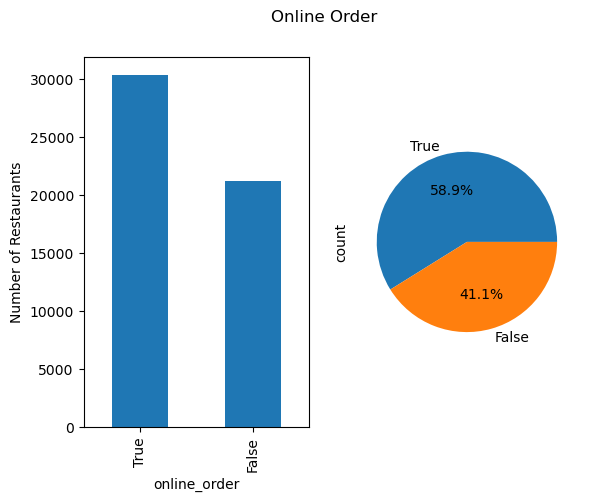

In [86]:
# online_order
fig,ax=plt.subplots(1,2)
fig.suptitle('Online Order')
data['online_order'].value_counts().reindex([True,False]).plot(kind='bar',ax=ax[0])
ax[0].set_ylabel('Number of Restaurants')

data['online_order'].value_counts().plot(kind='pie',autopct='%1.1f%%',ax=ax[1])

plt.show()


``book_table``

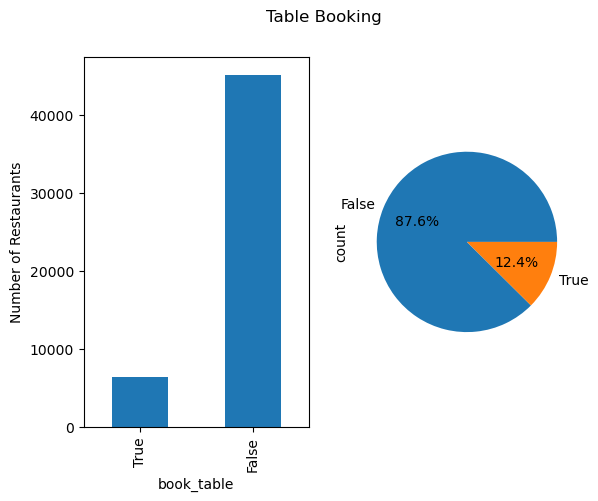

In [87]:
# book_table
fig,ax=plt.subplots(1,2)
fig.suptitle('Table Booking')
data['book_table'].value_counts().reindex([True,False]).plot(kind='bar',ax=ax[0])
ax[0].set_ylabel('Number of Restaurants')

data['book_table'].value_counts().plot(kind='pie',autopct='%1.1f%%',ax=ax[1])

plt.show()


```location```

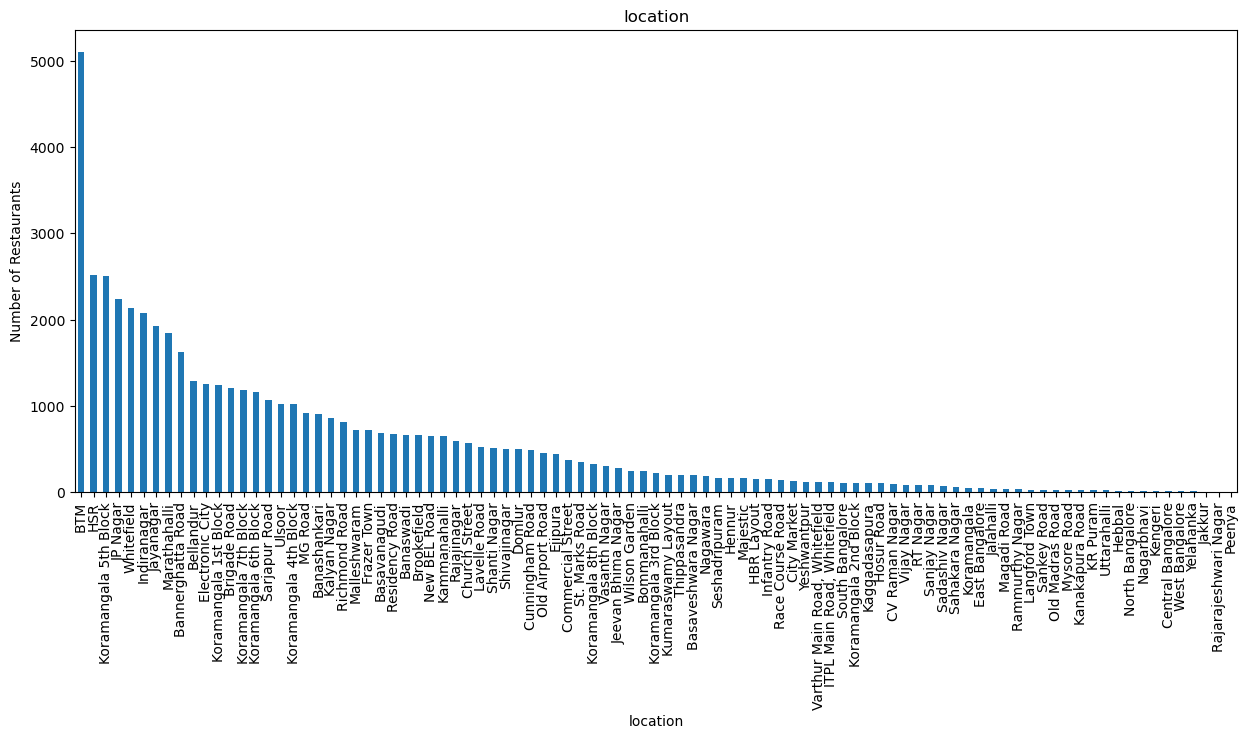

In [64]:
# location
data['location'].value_counts().plot(kind='bar',figsize=(15,6))
plt.title('location')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=90)
plt.show()

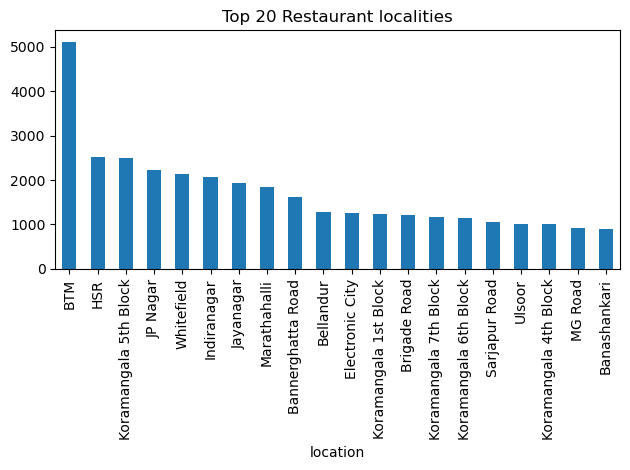

In [93]:
data['location'].value_counts().nlargest(20).plot(kind='bar')
plt.title('Top 20 Restaurant localities')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

```rest_type```

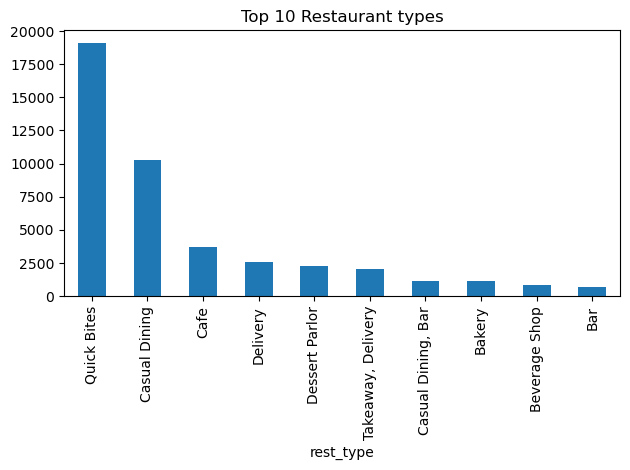

In [95]:
data['rest_type'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Restaurant types')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

`cuisine`

Text(0, 0.5, 'No. of restro')

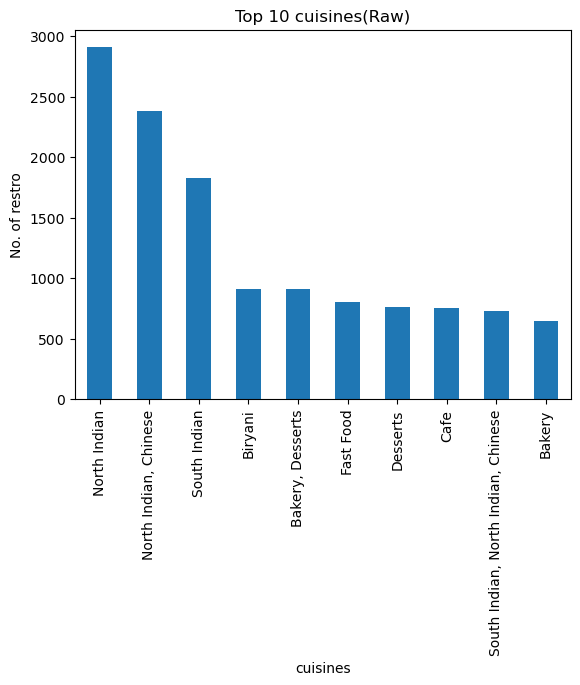

In [107]:
data['cuisines'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 cuisines(Raw)')
plt.ylabel('No. of restro')

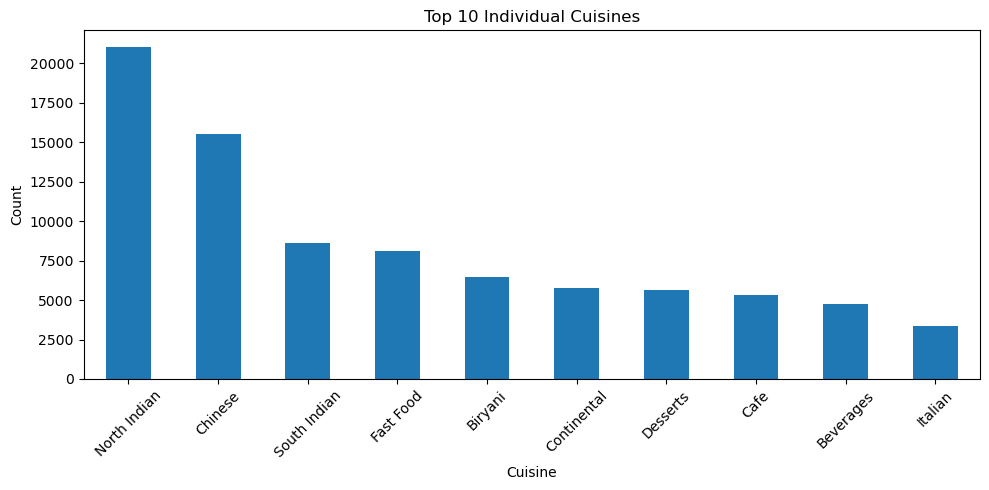

In [97]:
from collections import Counter

# Drop NaN & split by ','
cuisine_series = data['cuisines'].dropna().apply(lambda x: x.split(', '))

# Flatten list and count
all_cuisines = Counter([item for sublist in cuisine_series for item in sublist])

# Convert to DataFrame
cuisine_df = pd.DataFrame.from_dict(all_cuisines, orient='index', columns=['count']).sort_values('count', ascending=False)

# Plot
cuisine_df.head(10).plot(kind='bar', figsize=(10,5), legend=False)
plt.title('Top 10 Individual Cuisines')
plt.ylabel('Count')
plt.xlabel('Cuisine')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


`listed_in(type)`

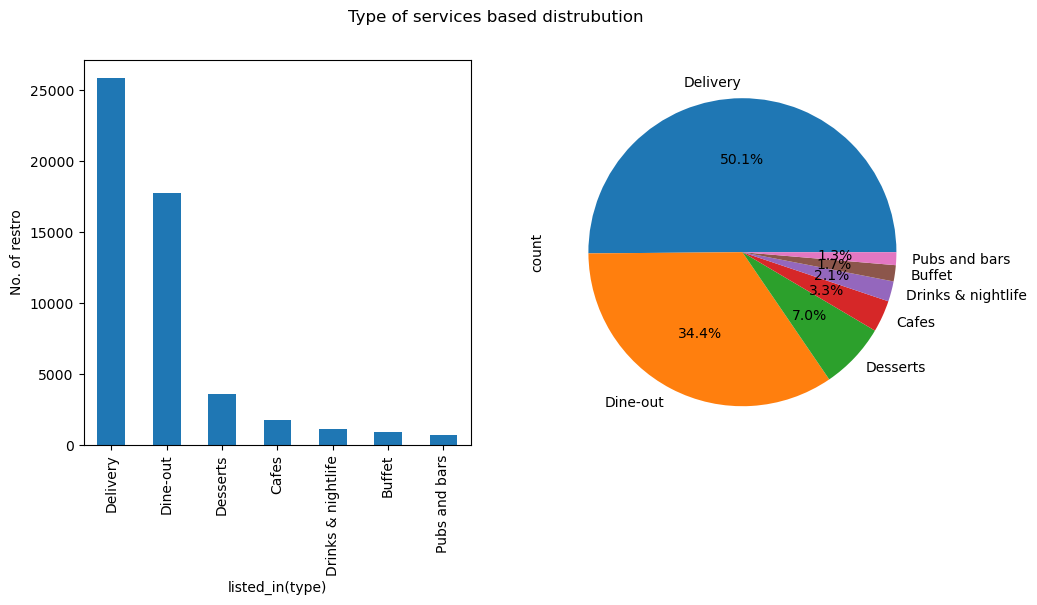

In [125]:
fig,ax=plt.subplots(1,2,figsize=(11,5))
fig.suptitle('Type of services based distrubution')
data['listed_in(type)'].value_counts().plot(kind='bar',ax=ax[0])
ax[0].set_ylabel('No. of restro')
plt.xticks(rotation=30)
data['listed_in(type)'].value_counts().plot(kind='pie',ax=ax[1],autopct='%1.1f%%')
plt.show()

`listed_in(city)`

Text(0.5, 1.0, 'Citywise distribution')

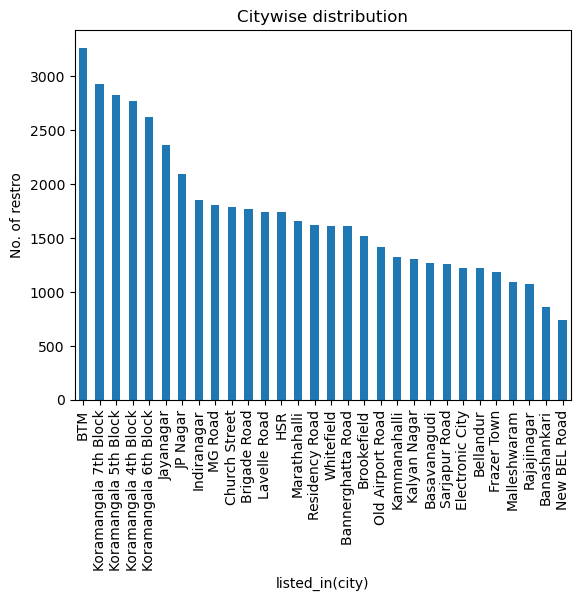

In [132]:
data['listed_in(city)'].value_counts().plot(kind='bar')
plt.ylabel('No. of restro')
plt.title('Citywise distribution')

Numerical

In [ ]:
Numerical :: rate	, votes , approx_cost(for two people)

*Insights*:

`rate`: Not normaly distributed(-ve skewed)(bimodoal)

`votes` : Not normaly distributed(+ve skewed)

`approx_cost(for two people)` : Not normaly distributed(+ve skewed)

In [137]:
temp=data['rate'].dropna()

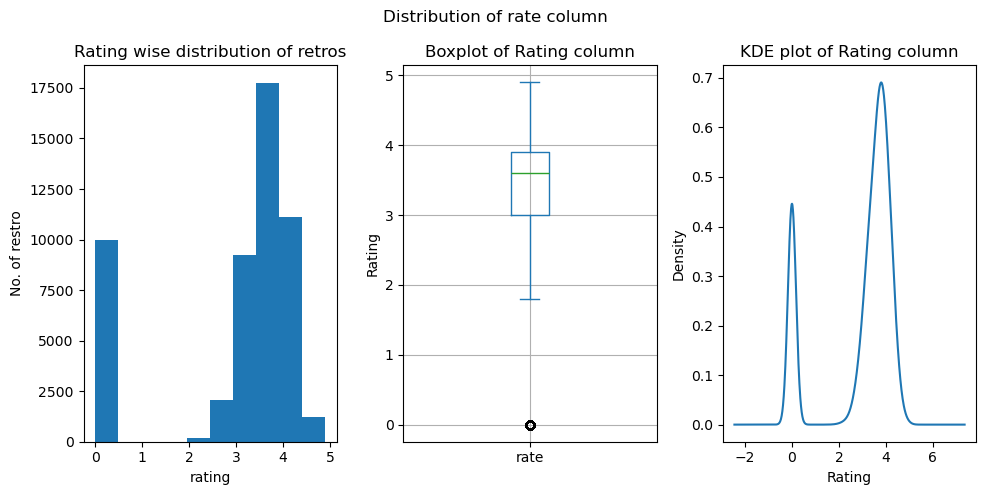

In [164]:
fig,ax=plt.subplots(1,3,figsize=(10,5))
fig.suptitle('Distribution of rate column')

temp.plot(kind='hist',ax=ax[0])
ax[0].set_xlabel('rating')
ax[0].set_ylabel('No. of restro')
ax[0].set_title('Rating wise distribution of retros')

temp.plot(kind='box',ax=ax[1])
ax[1].set_title('Boxplot of Rating column')
ax[1].set_ylabel('Rating')
ax[1].grid()

temp.plot(kind='kde',ax=ax[2])
ax[2].set_title('KDE plot of Rating column')
ax[2].set_xlabel('Rating')

plt.tight_layout()

In [139]:
temp.describe()

count    51525.000000
mean         2.985316
std          1.513464
min          0.000000
25%          3.000000
50%          3.600000
75%          3.900000
max          4.900000
Name: rate, dtype: float64

In [141]:
temp.skew()

-1.3074010121886555

In [ ]:
# votes

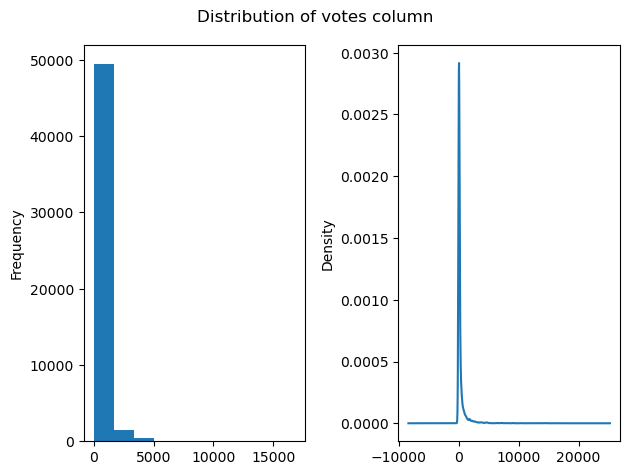

In [154]:
fig,ax=plt.subplots(1,2)
fig.suptitle('Distribution of votes column')
data['votes'].plot(kind='hist',ax=ax[0])
data['votes'].plot(kind='kde',ax=ax[1])
plt.tight_layout()

In [171]:
numerical_cols=['rate' , 'votes' , 'approx_cost(for two people)']

rate

description
count    51525.000000
mean         2.985316
std          1.513464
min          0.000000
25%          3.000000
50%          3.600000
75%          3.900000
max          4.900000
Name: rate, dtype: float64

skewness of data is  -1.3074010121886548


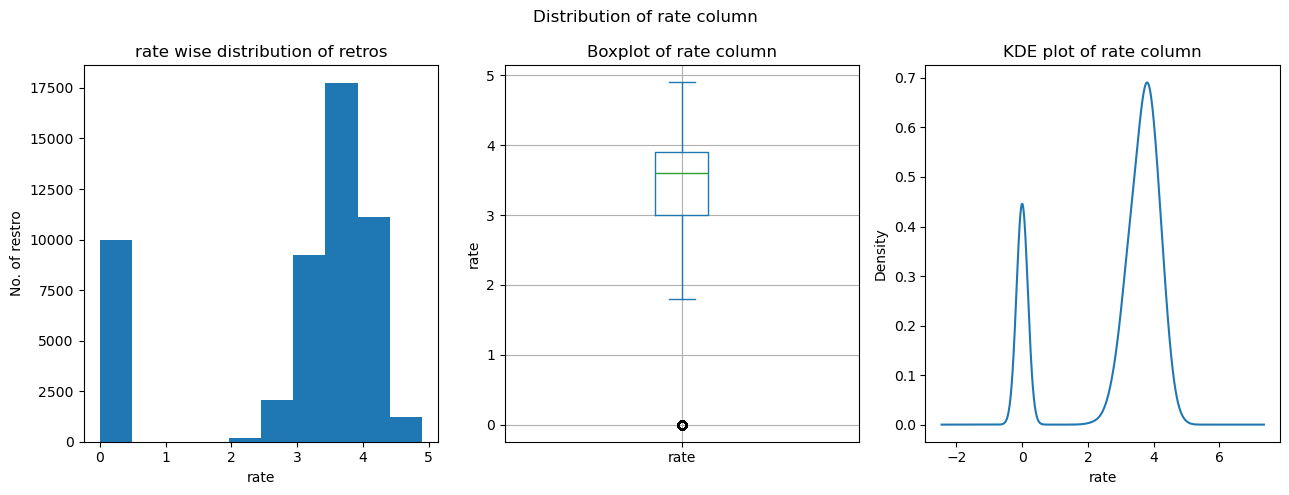



votes

description
count    51588.000000
mean       283.398678
std        803.425916
min          0.000000
25%          7.000000
50%         41.000000
75%        198.000000
max      16832.000000
Name: votes, dtype: float64

skewness of data is  7.563756205192253


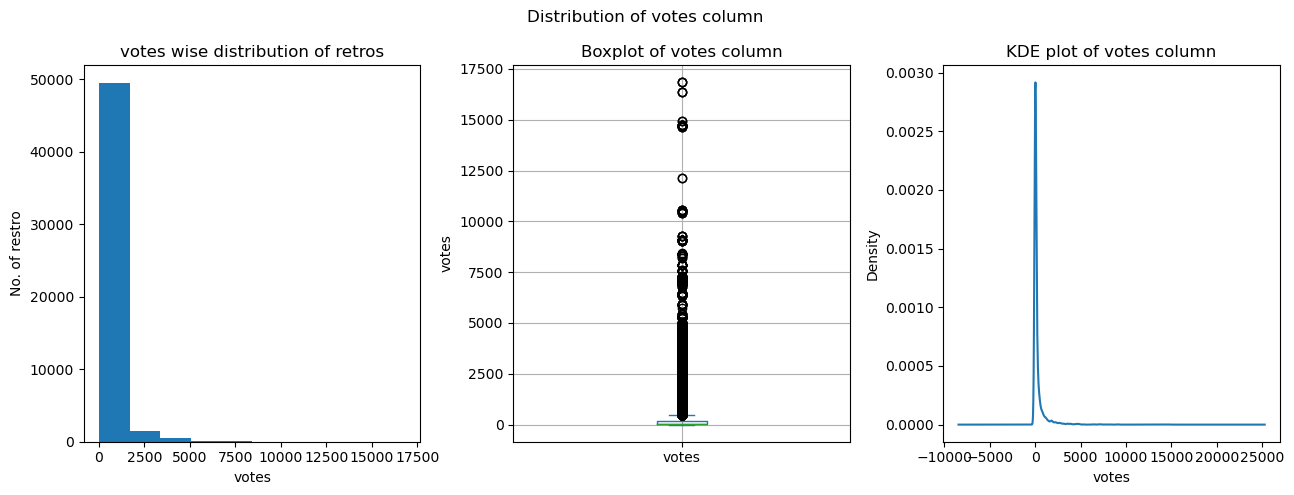



approx_cost(for two people)

description
count    51265.000000
mean       555.170682
std        438.587661
min         40.000000
25%        300.000000
50%        400.000000
75%        650.000000
max       6000.000000
Name: approx_cost(for two people), dtype: float64

skewness of data is  2.6065102349918523


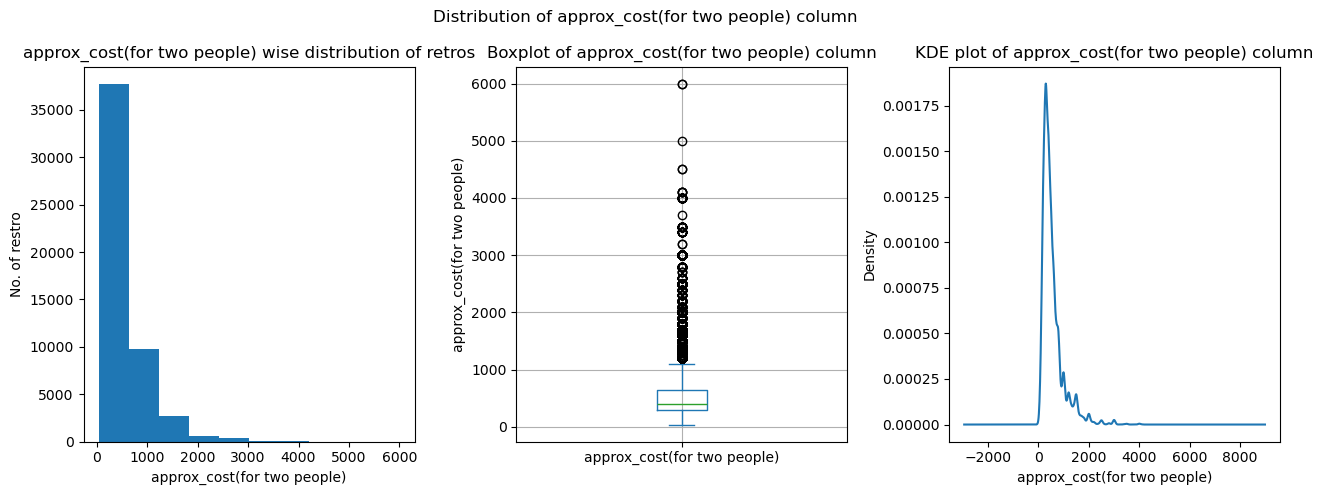

In [178]:
for cols in numerical_cols:
    print(f'{cols}')
    print()

    print('description')    
    print(data[cols].describe())
    print('\nskewness of data is ', data[cols].skew())
    fig,ax=plt.subplots(1,3,figsize=(13,5))
    fig.suptitle(f'Distribution of {cols} column')
    
    data[cols].dropna().plot(kind='hist',ax=ax[0])
    ax[0].set_xlabel(f'{cols}')
    ax[0].set_ylabel('No. of restro')
    ax[0].set_title(f'{cols} wise distribution of retros')
    
    data[cols].dropna().plot(kind='box',ax=ax[1])
    ax[1].set_title(f'Boxplot of {cols} column')
    ax[1].set_ylabel(f'{cols}')
    ax[1].grid()
    
    data[cols].dropna().plot(kind='kde',ax=ax[2])
    ax[2].set_title(f'KDE plot of {cols} column')
    ax[2].set_xlabel(f'{cols}')
    
    plt.tight_layout()
    plt.show()
    print()
    print()

# Bivariate analysis

In [ ]:
## Column type : >>
> Numerical :: rate	, votes , approx_cost(for two people)

> Catagorical :: online_order , book_table , location , rest_type ,	cuisines , listed_in(type) , listed_in(city)


### Cat vs Cat

online_order vs book_table >> crosstable
online_order vs rest_type
online_order vs listed_in(type)
online_order vs listed_in(city)

book_table vs rest_type
book_table vs listed_in(type)
book_table vs listed_in(city)

location vs rest_type
location vs listed_in(type)
location vs listed_in(city)

rest_type vs listed_in(type)
rest_type vs listed_in(city)

listed_in(type) vs listed_in(city)

cuisines vs location
cuisines vs listed_in(city)
cuisines vs rest_type

In [ ]:
````````````````````````````````````````````````````````````````````````````````````````````````````````````````````

Text(0, 0.5, 'No. of restro')

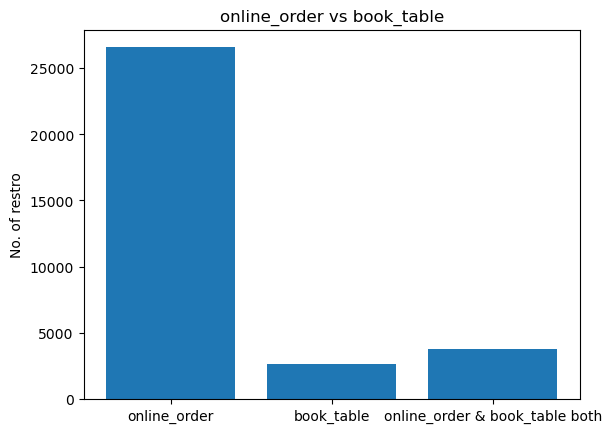

In [215]:
temp={}

temp['online_order']=len(data[(data['online_order']==True) & (data['book_table']==False)])

temp['book_table']=len(data[(data['online_order']==False) & (data['book_table']==True)])

temp['online_order & book_table both']=len(data[data['online_order'] & data['book_table']])
temp
plt.bar(temp.keys(),temp.values())
plt.title('online_order vs book_table')
plt.ylabel('No. of restro')

In [ ]:
````````````````````````````````````````````````````````````````````````````````````````````````````````````````````

online_order vs rest_type                                                                      book_table vs rest_type


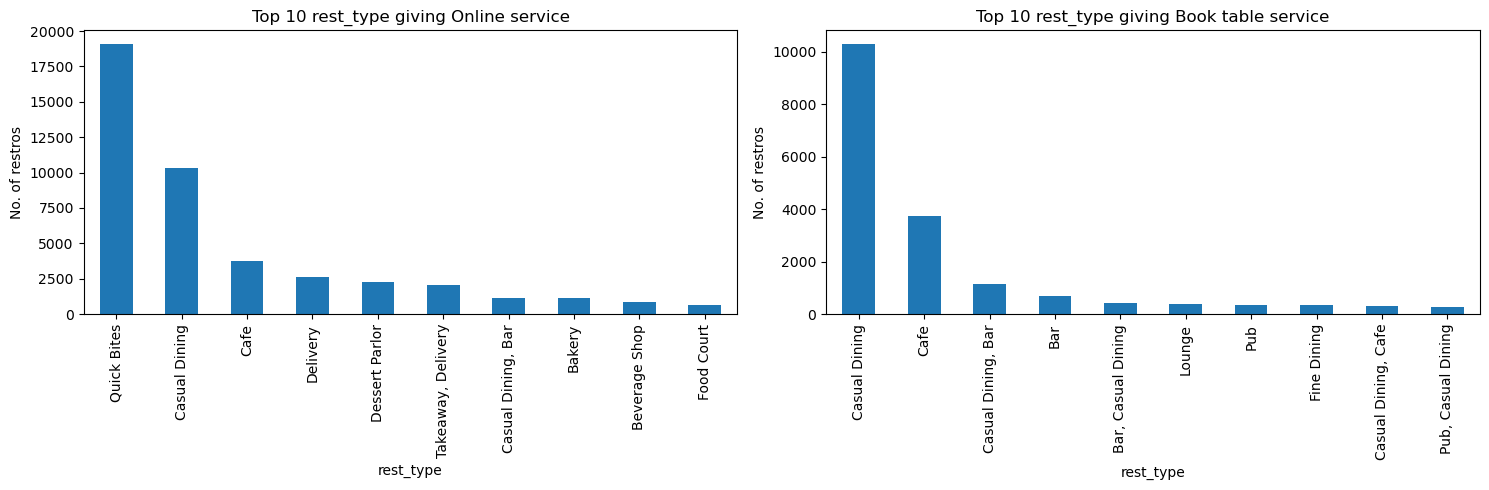


online_order vs listed_in(type)                                                                      book_table vs listed_in(type)


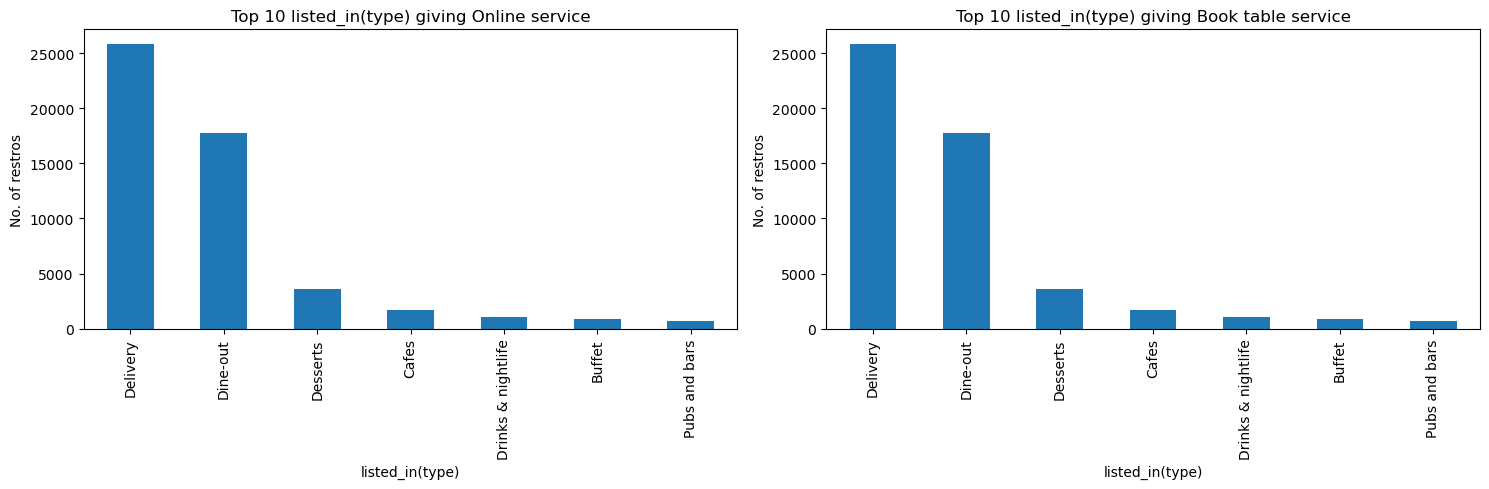


online_order vs listed_in(city)                                                                      book_table vs listed_in(city)


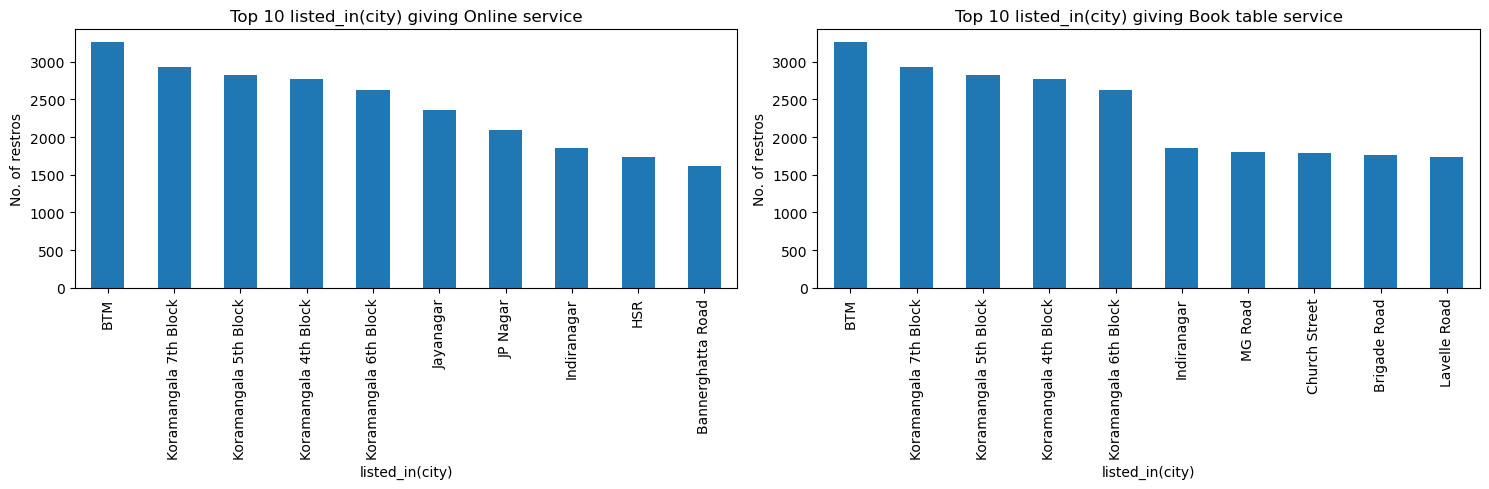

In [262]:
temp_list=['rest_type','listed_in(type)','listed_in(city)']



for col in temp_list:
    print(f"online_order vs {col}                                                                      book_table vs {col}")
    rows1=data.groupby(col)['online_order'].sum().nlargest(10).index.to_list()
    temp1=data[col].value_counts().loc[rows1].sort_values(ascending=False)
    rows2=data.groupby(col)['book_table'].sum().nlargest(10).index.to_list()
    temp2=data[col].value_counts().loc[rows2].sort_values(ascending=False)
    fig,ax=plt.subplots(1,2,figsize=(15,5))
    temp1.plot(kind='bar',ax=ax[0])
    ax[0].set_ylabel('No. of restros')
    ax[0].set_title(f'Top 10 {col} giving Online service')
    temp2.plot(kind='bar',ax=ax[1])
    ax[1].set_ylabel('No. of restros')
    ax[1].set_title(f'Top 10 {col} giving Book table service')
    plt.tight_layout()
    plt.show()
    print()


In [ ]:
location vs rest_type
location vs listed_in(type)
location vs listed_in(city)

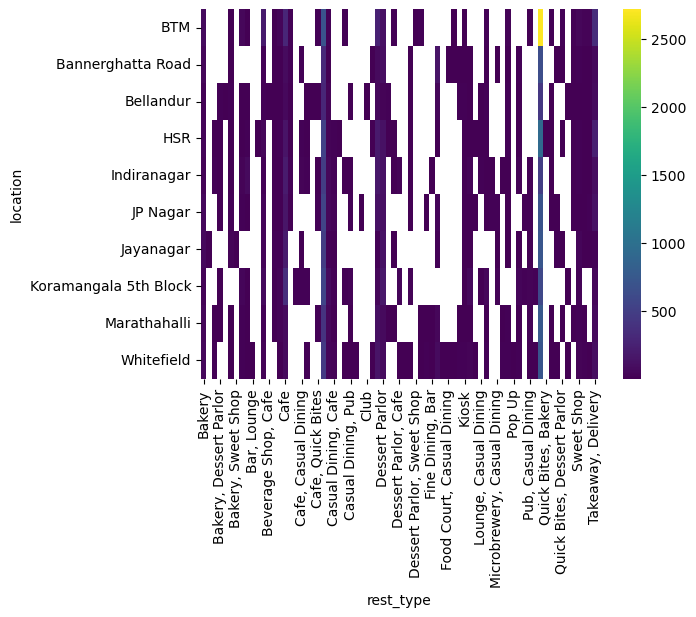

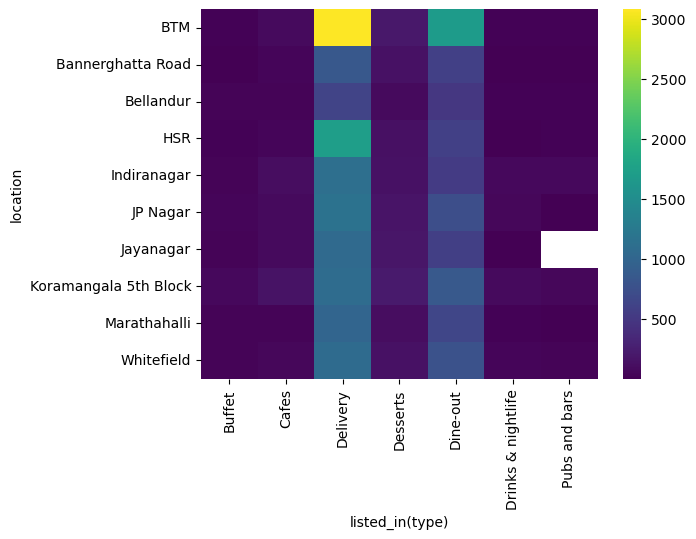

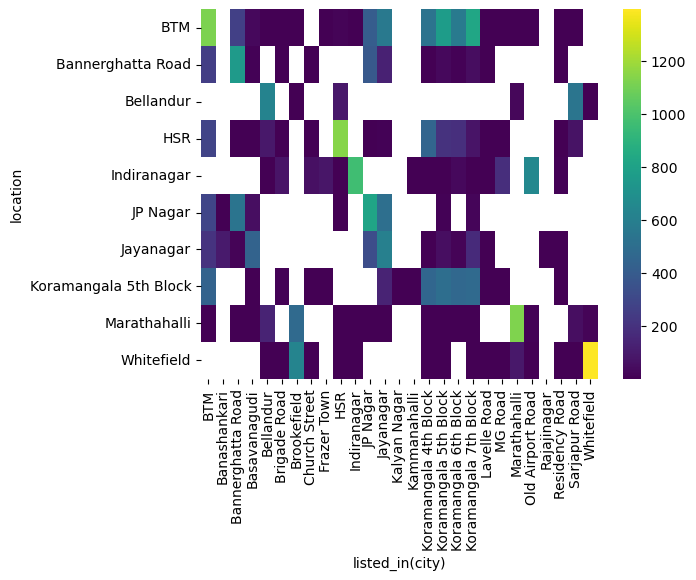

listed_in(city),BTM,Banashankari,Bannerghatta Road,Basavanagudi,Bellandur,Brigade Road,Brookefield,Church Street,Frazer Town,HSR,...,Koramangala 6th Block,Koramangala 7th Block,Lavelle Road,MG Road,Marathahalli,Old Airport Road,Rajajinagar,Residency Road,Sarjapur Road,Whitefield
location,,,,,,,,,,,,,,,,,,,,,
BTM,1123.0,NaN,264.0,30.0,1.0,2.0,1.0,NaN,1.0,13.0,...,569.0,827.0,2.0,2.0,1.0,1.0,NaN,1.0,1.0,NaN
Bannerghatta Road,254.0,NaN,756.0,9.0,NaN,1.0,NaN,1.0,NaN,NaN,...,9.0,49.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Bellandur,NaN,NaN,NaN,NaN,623.0,NaN,1.0,NaN,NaN,90.0,...,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,541.0,4.0
HSR,284.0,NaN,1.0,1.0,90.0,2.0,NaN,2.0,NaN,1143.0,...,187.0,77.0,2.0,2.0,NaN,NaN,NaN,2.0,68.0,NaN
Indiranagar,NaN,NaN,NaN,NaN,1.0,75.0,NaN,60.0,81.0,2.0,...,30.0,3.0,3.0,183.0,NaN,653.0,NaN,8.0,NaN,NaN
JP Nagar,287.0,4.0,539.0,55.0,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jayanagar,205.0,96.0,12.0,442.0,NaN,NaN,NaN,NaN,NaN,NaN,...,13.0,166.0,2.0,NaN,NaN,NaN,1.0,2.0,NaN,NaN
Koramangala 5th Block,439.0,NaN,NaN,4.0,NaN,7.0,NaN,1.0,3.0,NaN,...,467.0,479.0,1.0,2.0,NaN,NaN,NaN,1.0,NaN,NaN
Marathahalli,5.0,NaN,2.0,1.0,135.0,NaN,478.0,NaN,NaN,2.0,...,2.0,3.0,NaN,NaN,1126.0,11.0,NaN,NaN,55.0,12.0


In [304]:
temp_list=data['location'].value_counts().nlargest(10).index.to_list()
col_list=['rest_type','listed_in(type)','listed_in(city)']

for col in col_list:
    temp_data=data.groupby('location')[col].value_counts()
    temp_data=temp_data.loc[temp_list].reset_index()
    
    temp_data=pd.crosstab(index=temp_data['location'],columns=temp_data[col],values=temp_data['count'],aggfunc='sum')
    sns.heatmap(temp_data,cmap='viridis')
    plt.show()
    print()

In [ ]:
rest_type vs listed_in(type)
rest_type vs listed_in(city)

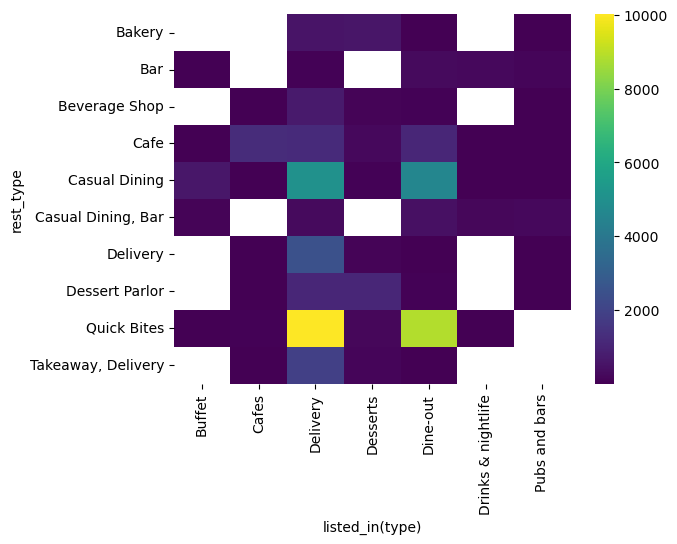

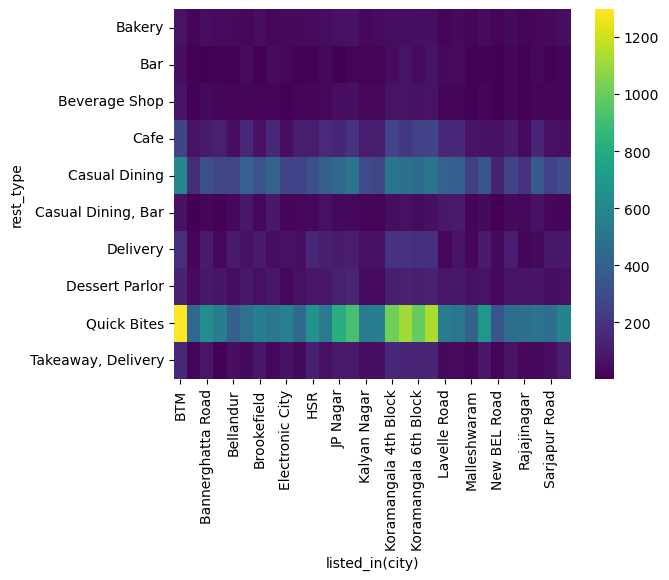

In [305]:
temp_list=data['rest_type'].value_counts().nlargest(10).index.to_list()
col_list=['listed_in(type)','listed_in(city)']

for col in col_list:
    temp_data=data.groupby('rest_type')[col].value_counts()
    temp_data=temp_data.loc[temp_list].reset_index()
    
    temp_data=pd.crosstab(index=temp_data['rest_type'],columns=temp_data[col],values=temp_data['count'],aggfunc='sum')
    sns.heatmap(temp_data,cmap='viridis')
    plt.show()
    print()

In [ ]:
# listed_in(type) vs listed_in(city)

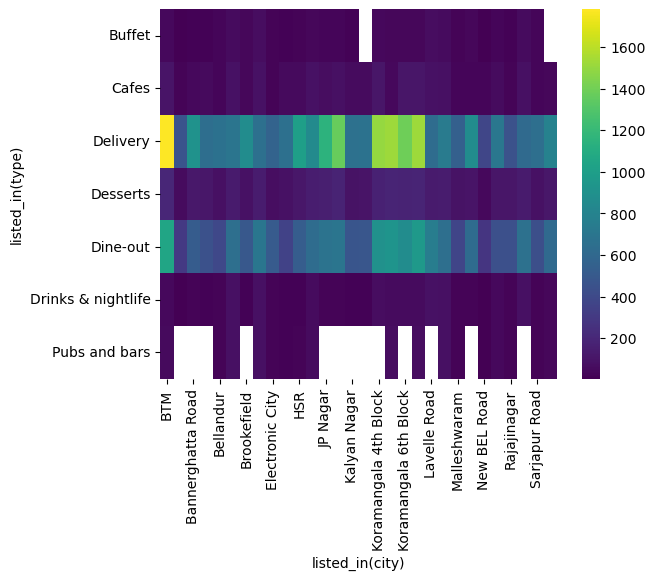

In [306]:
temp_list=data['listed_in(type)'].value_counts().nlargest(10).index.to_list()

temp_data=data.groupby('listed_in(type)')['listed_in(city)'].value_counts()
temp_data=temp_data.loc[temp_list].reset_index()

temp_data=pd.crosstab(index=temp_data['listed_in(type)'],columns=temp_data['listed_in(city)'],values=temp_data['count'],aggfunc='sum')
sns.heatmap(temp_data,cmap='viridis')
plt.show()
print()

In [ ]:
cuisines vs location
cuisines vs listed_in(city)
cuisines vs rest_type

In [321]:
cuisines_series=data['cuisines'].dropna().str.split(',')
individual=Counter(itm for x in cuisines_series for itm in x)
temp_df=pd.DataFrame.from_dict(individual,orient='index', columns=['count']).sort_values('count', ascending=False).head(10)


In [327]:
words=temp_df.index.to_list()

In [328]:
word_count={}
for word in words:
    word_count[word]=[]


In [336]:
# word_count

In [330]:
data=data.reset_index(drop=True)

In [331]:
data

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51583,Best Brews - Four Points by Sheraton Bengaluru...,False,False,3.6,27,Whitefield,Bar,Continental,1500.0,Pubs and bars,Whitefield
51584,Vinod Bar And Restaurant,False,False,0.0,0,Whitefield,Bar,Finger Food,600.0,Pubs and bars,Whitefield
51585,Plunge - Sheraton Grand Bengaluru Whitefield H...,False,False,0.0,0,Whitefield,Bar,Finger Food,2000.0,Pubs and bars,Whitefield
51586,Chime - Sheraton Grand Bengaluru Whitefield Ho...,False,True,4.3,236,"ITPL Main Road, Whitefield",Bar,Finger Food,2500.0,Pubs and bars,Whitefield


In [334]:

for i in range(51588):
    for word in words:
        if word in data['cuisines'].iloc[i] :
            word_count[word].append(data['location'].iloc[i])
        

In [343]:
# pd.DataFrame.from_dict(word_count)
temp=[]
for key,vlist in word_count.items() :
    vcount=Counter(vlist)
    for city, count in vcount.items():
        temp.append((key,city,count))

In [347]:
temp_df=pd.DataFrame(temp)

In [358]:
temp_df.rename(columns={0 :'cuisines',1:'location',2:'count'},inplace=True)

In [369]:
temp_pivot=temp_df.pivot_table(index='cuisines', columns='location', values='count', aggfunc='sum')


In [370]:
temp_pivot

location,BTM,Banashankari,Banaswadi,Bannerghatta Road,Basavanagudi,Basaveshwara Nagar,Bellandur,Bommanahalli,Brigade Road,Brookefield,...,Ulsoor,Uttarahalli,"Varthur Main Road, Whitefield",Vasanth Nagar,Vijay Nagar,West Bangalore,Whitefield,Wilson Garden,Yelahanka,Yeshwantpur
cuisines,,,,,,,,,,,,,,,,,,,,,
Beverages,356.0,62.0,38.0,99.0,45.0,13.0,57.0,5.0,63.0,37.0,...,56.0,1.0,7.0,25.0,9.0,NaN,92.0,10.0,NaN,2.0
Chinese,1536.0,221.0,164.0,404.0,131.0,39.0,322.0,78.0,232.0,226.0,...,202.0,7.0,20.0,76.0,32.0,1.0,517.0,78.0,NaN,62.0
Continental,155.0,58.0,37.0,29.0,16.0,5.0,49.0,3.0,179.0,26.0,...,137.0,NaN,3.0,33.0,2.0,1.0,152.0,NaN,NaN,2.0
Desserts,157.0,58.0,35.0,109.0,71.0,15.0,99.0,7.0,74.0,51.0,...,84.0,NaN,8.0,35.0,7.0,NaN,151.0,6.0,NaN,4.0
Fast Food,636.0,98.0,72.0,199.0,114.0,17.0,113.0,22.0,142.0,88.0,...,127.0,NaN,2.0,46.0,3.0,1.0,156.0,12.0,NaN,5.0
North Indian,951.0,143.0,120.0,280.0,80.0,38.0,189.0,65.0,193.0,90.0,...,168.0,8.0,25.0,65.0,18.0,1.0,382.0,59.0,NaN,25.0
South Indian,407.0,55.0,57.0,118.0,40.0,17.0,103.0,35.0,98.0,61.0,...,87.0,1.0,8.0,9.0,13.0,NaN,146.0,16.0,2.0,20.0
Cafe,323.0,114.0,60.0,145.0,50.0,19.0,82.0,4.0,137.0,56.0,...,186.0,NaN,NaN,55.0,2.0,NaN,149.0,6.0,NaN,4.0
North Indian,2461.0,308.0,223.0,701.0,189.0,65.0,659.0,129.0,321.0,282.0,...,374.0,13.0,47.0,127.0,35.0,1.0,1059.0,132.0,NaN,72.0


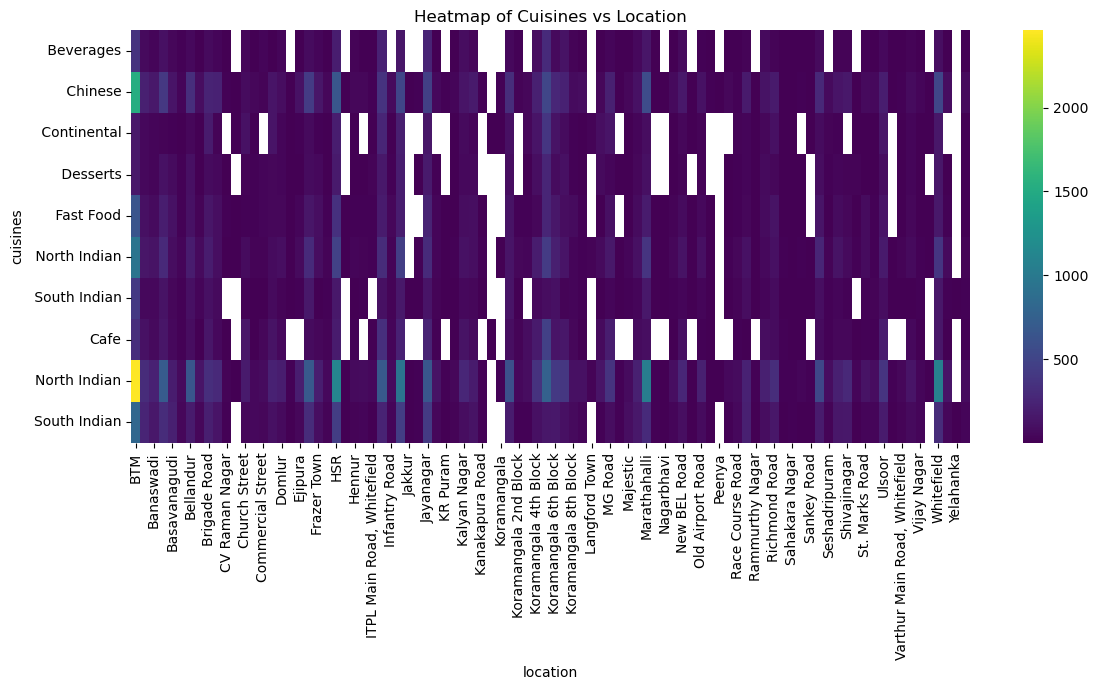

In [382]:
plt.figure(figsize=(12, 7))         # Set the figure size here
sns.heatmap(temp_pivot, cmap='viridis')
plt.title("Heatmap of Cuisines vs Location")
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
> Numerical :: rate	, votes , approx_cost(for two people)

In [ ]:
rate vs approx_cost(for two people)

In [414]:
temp=data[['approx_cost(for two people)','rate']].copy()

In [415]:
temp.dropna(subset=['approx_cost(for two people)','rate'], inplace=True)

In [416]:
temp.reset_index(drop=True, inplace=True)

In [417]:
data['approx_cost(for two people)'].nunique()

70

In [419]:
temp['approx_cost(for two people)'].sort_values()

32187      40.0
12177      40.0
26848      40.0
17657      40.0
18764      40.0
          ...  
41760    4500.0
41213    4500.0
39900    5000.0
45187    6000.0
19011    6000.0
Name: approx_cost(for two people), Length: 51205, dtype: float64

In [423]:
temp=temp.groupby('approx_cost(for two people)')['rate'].mean()

In [442]:
temp_top25=temp.reset_index().sort_values('rate',ascending=False).head(25).sort_values('approx_cost(for two people)')

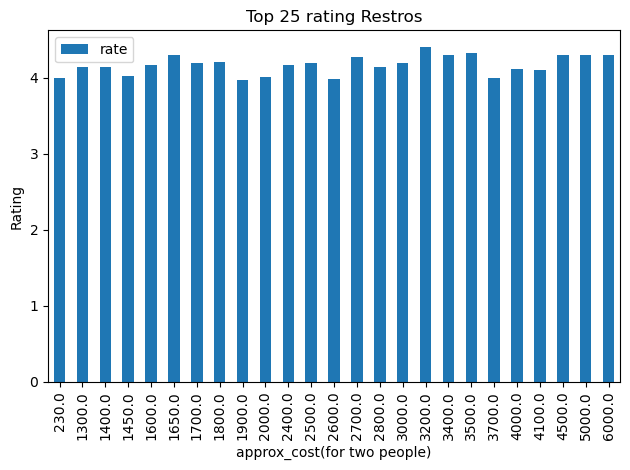

In [445]:
temp_top25.plot(kind='bar',x='approx_cost(for two people)',y='rate')
plt.title('Top 25 rating Restros')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

# Analysis